# IMDB Sentimental Analysis with Neural Networks
*****

### Step 1: Import the Modules
_____

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot
from operator import itemgetter 

In [ ]:
# $ pip install tensorflow --> https://www.tensorflow.org/install/
import tensorflow as tf

In [ ]:
# $ pip install keras
from keras import models, regularizers, layers, optimizers, losses, metrics


### Step 2: Load & Inspect the 50,000 reviews in the IMDB Dataset
_____

#### Load only the 10,000 most frequent words in 50,000 reviews (num_words)

- another way to download the dataset online: https://keras.io/datasets/

In [4]:
from keras.datasets import imdb
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import np_utils, to_categorical

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Total number of reviews: ", train_data.size + test_data.size)

Total number of reviews:  50000


#### The reviews:
- `train_data` & `test_data`:  array[L][S]
    - L = list of 25k review indexes
    - S = sequence of integers encoding each of the 25k reviews. 
        - length = len(array[L])
        - the values of the word/sequence integers are from 0 to 9999 (word indexes) 

In [6]:
# First 2 reviews & their mapped sequences (word indexes) in the train_data array
train_data[0:2][:]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [7]:
# Number of words/sequences in the first train_data review
len(train_data[0][:])

218

In [8]:
# Highest num_words sequence value (word index) in the training data
max([max(sequence) for sequence in train_data])

9999

In [9]:
#Longest review                  i.e. max num_word sequences in a training data review
max([len(sequence) for sequence in train_data])

longest_sequence_length = max([len(sequence) for sequence in train_data])
longest_reviews = [sequence for sequence in train_data if len(sequence) == longest_sequence_length]

print(longest_sequence_length)
#print(longest_reviews[0])

2494


In [10]:
# Shortest reviews
shortest_sequence_length = min([len(sequence) for sequence in train_data])
shortest_reviews = [sequence for sequence in train_data if len(sequence) == shortest_sequence_length]

shortest_reviews[0]

[1, 13, 586, 851, 14, 31, 60, 23, 2863, 2364, 314]

#### The classifications:
- `train_labels` & `test_labels`: 
    - array[L] = 0 = negative
    - array[L] = 1 = positive
    

In [11]:
# Sentiment classification for each of the first 10 reviews
train_labels[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)


### Step 3: Convert the num_words sequence ints --> into words
___

#### Retrieve the dictionary

`.get_word_index()` --> Retrieves the Keras dictionary mapping: (values=words, keys=indices)

In [12]:
word_index = imdb.get_word_index()

In [13]:
dict(list(word_index.items())[0:5])

{'fawn': 34701,
 'nunnery': 52007,
 'sonja': 16816,
 'tsukino': 52006,
 'vani': 63951}

#### Reverse the dictionary: 
map (values=indices, keys=words)

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [15]:
dict(list(reverse_word_index.items())[0:5])

{16816: 'sonja',
 34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 63951: 'vani'}

#### Decode a NEGATIVE TRAINING review

Use --> `dict.get` ( `key - 3`,   default in case key doesn't exist)

Indices are offset by 3:
- 0 = padding
- 1 = startof sequence
- 2 = unknown

Default in case the key doesn't exist => `?`

In [16]:
decoded_review_train = ' '.join( [reverse_word_index.get(i - 3, '?') for i in train_data[4]])

In [17]:
decoded_review_train

"? worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the ? and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"

Ensure that the classification label will be 0 = negative

In [18]:
train_labels[4]

0

#### Decode a POSITIVE TESTING review

In [19]:
decoded_review_test = ' '.join( [reverse_word_index.get(i - 3, '?') for i in test_data[100]])
decoded_review_test

"? a quick glance at the premise of this film would seem to indicate just another dumb ? ? ? slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread ? tension amidst a lovely ? backdrop these feelings are further ? by a cast of realistically likable characters and ? that are more amoral than cardboard ? of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' ? came from"

In [20]:
test_labels[100]

1

### Step 4: Vectorize the data to be fed into a Neural Network
____

We have a binary classification problem, involving two output classes.

#### Vectorize the data by turning LISTS into TENSORS. 

- Can't feed integer lists into neural network

- One-hot encode the sequences of words as binary vectors: turn lists into vectors of 0s and 1s
    - ie: `[1,2]` turns into --> 
        - 10k dimensional vector of 0s &
        - Vectors of 1s in indices 1 & 2
        - there are other encoding options available
- 1st layer = `Dense` layer, capable of handling floating-point vector data.
    - `Dense` layers can solve other problems, not just sentiment classification

#### Function below:
* Creates an all-zero matrix (`results`) of shape (len(sequences), dimension)
* Sets `results[i]`'s indices to 1s

In [21]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

Vectorize the training data reviews:

In [22]:
x_train = vectorize_sequences(train_data)
x_train[4]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorize the training data labels:

In [23]:
y_train = np.asarray(train_labels).astype('float32')
y_train[4]

0.0

Vectorize the test data reviews:

In [24]:
x_test = vectorize_sequences(test_data)
x_test[100]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorize the testing data labels:

In [25]:
y_test = np.asarray(test_labels).astype('float32')
y_test[100]

1.0


### Step 5: Build the Network
___ 


Import Keras' models and layers

In [26]:
from keras import models

In [27]:
from keras import layers

In [28]:
model = models.Sequential()

#### Network shape:
- vectors will represent the INPUT DATA
- scalars will represent the LABELS 0 & 1


#### --> Network type: `Dense(16, activation ='relu')`
* Type of layers: 
    - fully connected `Dense` layers (with `relu` activations)

* Number of hidden layers: 2
    -  this affections validation and accuracy
    - the 3rd layer will output the scalar prediction of the review sentiment

* Number of hidden units per layer: 16
    - other choices: 32, 64
    - the input data will be projected onto a 16-dimensional representation space
    - the dimensionality determines how much freedom you allow the network to learn internal representations
    - the higher the number, the more complex the representation, which can lead to unwanted patterns in train_data

* Type of loss function: `binary_crossentropy`
    - other choice: `mse`
    
#### "Chain of tensor operations": `output = relu(dot(W, input) + b)`
     - implemented by each Dense layer with relu activation
- 1) `dot(W, input)` 
    - dot product with `W` & projects the input data onto 16D space
        - `W` = weight matrix 
        - shape = `(input_dimension, 16)` for the 16 hidden units
- 2) `(dot(W, input) + b)` 
    - then add the bias vector B
- 3) `relu(dot(W, input) + b)` 
    - then apply the relu operation



In [29]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

#### Activation functions
* Type of activation function in intermediate layers: `relu`
    - a rectified linear unit
    - function for eliminating negative values: turns them to 0
    - most popular activation function in deep learning. 
    - other choice: `tanh`, previously used in early neural networks
    
    
- Type of activation in FINAL layer: `sigmoid`
    - detects if the review sentiment is positive (1) or negative (0) by indicating likelihood of having target "1"
    - squashes arbitrary values into the [0, 1] interval
        - its output can be interpreted as a probability score
        

- Purpose of the activation function:
    - layer learns non-linear transformations of the input data
    - non-linearity gives access to richer hypothesis space that benefits from deep representations
    - Without activation, Dense layer is just this:
        - `output = dot(W, input) + b`
        - 2 linear functions: dot product & addition

In [30]:
model.add(layers.Dense(16, activation='relu'))

In [31]:
model.add(layers.Dense(1, activation='sigmoid'))


### Step 6: Compile the model 
___

In [32]:
from keras import optimizers
from keras import losses
from keras import metrics

#### `compile()` string arguments, packaged as part of Keras:
- optimizer = `rmsprop`
        - generally a good choice of optimizer, no matter the problem
- loss function = `binary_crossentropy`
        - best suited for a binary classification problem with probability outputs
        - the end of network is a single-unit layer with a `sigmoid` activation
        - measures distance between:
            - probability distributions
            - ground-truth distribution & prediction
- metrics = `accuracy`

In [33]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#### Configure the parameters of the optimizer:
- pass an optimizer class instance, `RMSprop(lr=0.001)`

In [34]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#### Customizing losses/metrics
- pass function object, `binary_crossentropy`

In [35]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])


### Step 7: Train the validation model using `fit.()`
___ 

#### Split the sets: `partial_x_train` for training & `x_val` for validating

In [36]:
partial_x_train = x_train[10000:]
len(partial_x_train)

15000

In [37]:
x_val = x_train[:10000]
len(x_val)

10000

#### Split the sets: `partial_y_train` for training & `y_val` for validating

In [38]:
partial_y_train = y_train[10000:]
len(partial_y_train)

15000

In [39]:
y_val = y_train[:10000]
len(y_val)

10000

#### Train model using `.fit()`

In [40]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

`model.fit()` arguments for training the model:
- `partial_x_train` & `partial_y_train` = 15k dataset for training
- `epochs` = 20 iterations over the `x_train` & `y_train` tensors
- `batch_size` = 512 mini batches of training samples
- `validation_data` = monitor the loss and the accuracy on a validation set of 10k, `x_val` and `y_val`

In [41]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 592us/step - loss: 0.4977 - acc: 0.7951 - val_loss: 0.3718 - val_acc: 0.8723
Epoch 2/20
15000/15000 [==============================] - 4s 260us/step - loss: 0.2959 - acc: 0.9043 - val_loss: 0.2990 - val_acc: 0.8909
Epoch 3/20
15000/15000 [==============================] - 3s 233us/step - loss: 0.2160 - acc: 0.9285 - val_loss: 0.3084 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.1742 - acc: 0.9434 - val_loss: 0.2831 - val_acc: 0.8842
Epoch 5/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.1415 - acc: 0.9542 - val_loss: 0.2863 - val_acc: 0.8853
Epoch 6/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3086 - val_acc: 0.8809
Epoch 7/20
15000/15000 [==============================] - 3s 217us/step - loss: 0.0970 - acc: 0.9711 - val_loss: 0.3146 - 

####  `model.fit()` 's history object:
- a dictionary containing data about what happened during training


In [42]:
history_dict = history.history

- 1 entry for every metric, 4 total:
    - `val_loss`
    - `val_acc`
    - `loss`
    - `acc`

In [43]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Step 8: Plot the training & the validation history
____

Compare the losses and accuracy using `matplotlib`

In [44]:
import matplotlib.pyplot as plt

#### Training and validation LOSS
Training loss will DECREASE with every epoch


In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']

In [46]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [47]:
epochs = range(1, len(acc) + 1)

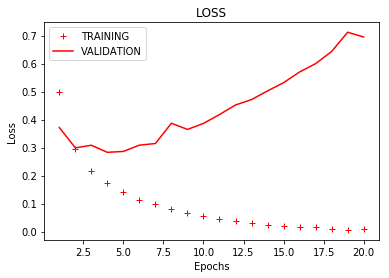

In [48]:
plt.plot(epochs, loss, 'r+', label='TRAINING') 
plt.plot(epochs, val_loss, 'r', label='VALIDATION') 
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Training and validation ACCURACY
Training accuracy will INCREASE with every epoch
- There is going to be overfitting after the 4th epoch
- after 2nd epoch, the training data is becoming optimized

In [49]:
plt.clf()   # clear figure

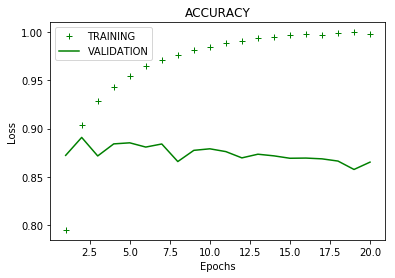

In [50]:
plt.plot(epochs, acc, 'g+', label='TRAINING')
plt.plot(epochs, val_acc, 'g', label='VALIDATION')
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 9: Train the `test` model
___

#### Begin the entire process from scratch

In [51]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#### Use only 4 epochs to prevent too much overfitting
Apply `fit` on the vectorized `x_train` review `y_train` label datasets

In [52]:
len(x_train)

25000

In [53]:
x_train[100]

array([0., 1., 1., ..., 0., 0., 0.])

In [54]:
len(y_train)

25000

In [55]:
y_train[100]

0.0

In [56]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 138us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 3s 126us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 3s 131us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 4s 149us/step - loss: 0.1679 - acc: 0.9404


#### Evaluate the model on vectorized `x_test` review and `y_test` label
The test model is an entirely new set of data (25k for `x` reviews & 25k for `y` labels). Must always monitor performance on data outside of the training set.

In [57]:
len(x_test)

25000

In [58]:
x_test[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [59]:
len(y_test)

25000

In [60]:
y_test[1]

1.0

In [61]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 12s 480us/step


The final results are as follows:

In [62]:
results

[0.3231498634147644, 0.87352]

This approach yields an accuracy of only 88% on the test set.

#### Experiment on POSITIVE review

In [63]:
test_data_vectorized_predictions = model.predict(x_test)

In [64]:
decoded_review_test_100 = ' '.join( [reverse_word_index.get(i - 3, '?') for i in test_data[100]])
decoded_review_test_100

"? a quick glance at the premise of this film would seem to indicate just another dumb ? ? ? slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread ? tension amidst a lovely ? backdrop these feelings are further ? by a cast of realistically likable characters and ? that are more amoral than cardboard ? of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' ? came from"

The review appears negative if you skim quickly. But upon further inspection you will see that the writer is actually praising the film.

Let's find out if our trained model can predict this positive sentment accurately:

In [65]:
print(test_data_vectorized_predictions[100])
print(y_test[100])

[0.03149404]
1.0


Nope. The test failed.

#### Try again, with a more obviously positive classification:

In [66]:
decoded_review_test_110 = ' '.join( [reverse_word_index.get(i - 3, '?') for i in test_data[110]])
decoded_review_test_110

"? this is one of my favorite t v shows of all time ? ? is simply a genius and it's only fitting that i chose this to be my 1000 review i can't begin to tell you how much i love mr bean he's the man and what ? me is how he gets out of these incredibly difficult situations and he is always so creative plus ? ? also deserves ? he is also a genius my favorite bit that he has done is the amazing adventures of mr bean and while all the rest of them are amazing this remains my true favorite plus i wish the show didn't stop so soon each episode is brilliantly written and they were all masterfully directed plus each episode is a classic in my eyes this show is incredibly popular and i can definitely see why as it's quite possibly the funniest show ever the character actors all played there roles really well especially ? ? and ? ? as ? this is one of my favorite t v shows of all time ? is simply put a genius and an incredibly talented comedian possibly the best and it's only fitting that i chos

In [67]:
print(test_data_vectorized_predictions[110])
print(y_test[110])

[0.99953735]
1.0
